In [1]:
###################
#EDA and Preprocessing
###################
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Reading in data
df = pd.read_csv('Data/SpotifyData.csv')
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Genre/Mood,Language,release_year
0,Tu Hi Hain Aashiqui,"Dishkiyaoon (feat. Palak Muchhal, Gayatri Ganj...",Various Artists,2014-03-12,298053,0,0.484,0.537,0.484,0.553,0.000000,0.0876,-5.384,0.0277,99.585,4,Hip-Hop,Hindi,2014
1,Tu Bin Bataye,Rang De Basanti (Original Motion Picture Sound...,A.R. Rahman,2005-12-04,357626,43,0.528,0.399,0.528,0.427,0.018800,0.0931,-10.848,0.0325,120.076,4,Hip-Hop,Hindi,2005
2,"Ajj Din Chadheya (From ""Love Aaj Kal "")",Love Aaj Kal,Pritam,2009-06-27,315013,44,0.585,0.551,0.585,0.687,0.000007,0.1210,-4.553,0.0724,85.871,4,Hip-Hop,Hindi,2009
3,"Main Jahaan Rahoon (From ""Namastey London"")",Namastey London,Himesh Reshammiya,2007-01-27,382493,43,0.584,0.362,0.584,0.556,0.000029,0.1300,-8.980,0.0514,103.739,4,Hip-Hop,Hindi,2007
4,Kaisa Yeh Junoon,Greatest Collection - Rahat Fateh Ali Khan,Rahat Fateh Ali Khan,2010-03-29,250453,26,0.669,0.655,0.669,0.517,0.000000,0.0913,-6.784,0.0277,115.977,4,Hip-Hop,Hindi,2010


In [6]:
df.info() #Need to encode categorical variables such as Genre/Mood and Language

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1253 non-null   object 
 1   album             1253 non-null   object 
 2   artist            1253 non-null   object 
 3   release_date      1253 non-null   object 
 4   length            1253 non-null   int64  
 5   popularity        1253 non-null   int64  
 6   danceability      1253 non-null   float64
 7   acousticness      1253 non-null   float64
 8   danceability.1    1253 non-null   float64
 9   energy            1253 non-null   float64
 10  instrumentalness  1253 non-null   float64
 11  liveness          1253 non-null   float64
 12  loudness          1253 non-null   float64
 13  speechiness       1253 non-null   float64
 14  tempo             1253 non-null   float64
 15  time_signature    1253 non-null   int64  
 16  Genre/Mood        1253 non-null   object 


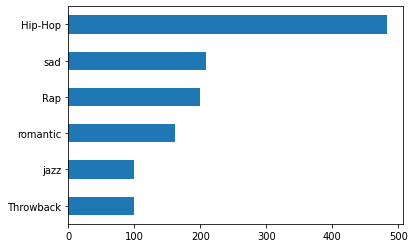

In [7]:
#Check each genre/mood
df['Genre/Mood'].value_counts().sort_values().plot(kind = 'barh')

In [8]:
#426 unique artists in dataset
len(df['artist'].unique())

426

In [9]:
#Check for 10 most frequent artists
n = 10
df['artist'].value_counts()[:n].index.tolist()

['Post Malone',
 'XXXTENTACION',
 'Drake',
 'The Weeknd',
 'Various Artists',
 'Vishal-Shekhar',
 'Shankar-Ehsaan-Loy',
 '50 Cent',
 'Pritam',
 'Jatin-Lalit']

In [10]:
#Check for most frequent artists by genre
group_genre = df.groupby("Genre/Mood")["artist"].value_counts().nlargest(15)
group_genre

Genre/Mood  artist            
Hip-Hop     Post Malone           56
sad         XXXTENTACION          53
            Drake                 44
Hip-Hop     The Weeknd            41
Throwback   Vishal-Shekhar        30
            Shankar-Ehsaan-Loy    25
Rap         50 Cent               23
Hip-Hop     Various Artists       18
romantic    Various Artists       18
Throwback   Jatin-Lalit           15
jazz        Miles Davis           13
Hip-Hop     Maluma                12
sad         Lewis Capaldi         12
Hip-Hop     Sachin-Jigar          11
Rap         Lil Uzi Vert          11
Name: artist, dtype: int64

In [11]:
#Preprocessing need to encode categorical variables in genre/mood and language
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
encodedVariables = df[['Genre/Mood','Language']]
enc.fit(encodedVariables[["Genre/Mood","Language"]])
encodedVariables[["Genre/Mood","Language"]] = enc.transform(encodedVariables[["Genre/Mood","Language"]])

In [12]:
#Ensuring different genres are encoded
encodedVariables['Genre/Mood'].value_counts()

0.0    483
5.0    208
1.0    200
4.0    162
3.0    100
2.0    100
Name: Genre/Mood, dtype: int64

In [13]:
#Ensuring different languages are encoded
encodedVariables['Language'].value_counts()

0.0    821
1.0    232
2.0    200
Name: Language, dtype: int64

In [14]:
#Concatenating encoded columns to original dataframe
df['encodedLanguage'] = encodedVariables['Language']
df['encodedGenre'] = encodedVariables['Genre/Mood']
df.tail()

##########
#Mapping
##########

#Genre:
#sad: 5
#romantic: 4
#jazz: 3
#Throwback: 2
#Rap: 1
#Hip-Hop: 0

#Language:
#Spanish: 2
#Hindi: 1
#English: 0

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,...,liveness,loudness,speechiness,tempo,time_signature,Genre/Mood,Language,release_year,encodedLanguage,encodedGenre
1248,"DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) ...","DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) ...",Justin Quiles,2019-09-06,258600,79,0.743,0.0451,0.743,0.709,...,0.0809,-3.922,0.0879,170.001,4,Hip-Hop,Spanish,2019,2.0,0.0
1249,Loco - Remix,Loco (Remix),Various Artists,2020-04-24,248499,81,0.908,0.1570,0.908,0.529,...,0.0634,-7.032,0.1350,105.021,4,Hip-Hop,Spanish,2020,2.0,0.0
1250,Feel Me,The Academy,Rich Music LTD,2019-10-11,300266,78,0.769,0.1200,0.769,0.747,...,0.0417,-4.560,0.1270,81.034,4,Hip-Hop,Spanish,2019,2.0,0.0
1251,Ella No Quiere Rosé,Ella No Quiere Rosé,Rvfv,2019-11-22,182500,60,0.861,0.1620,0.861,0.599,...,0.0322,-6.162,0.1420,95.990,4,Hip-Hop,Spanish,2019,2.0,0.0
1252,Morado,Morado,J Balvin,2020-01-09,200666,81,0.881,0.1370,0.881,0.696,...,0.0927,-3.838,0.0797,97.002,4,Hip-Hop,Spanish,2020,2.0,0.0


In [127]:
#######
#Model Building
######

In [44]:
#Main factors we are evaluating is release_year, genre/mood, artist, popularity to determine the song that we will output
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

#data = df[['encodedGenre','encodedLanguage','release_year','popularity']]
data = df[['encodedGenre','encodedLanguage','release_year','popularity']]
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1).fit(data)
distances, indices = model_knn.kneighbors(data)

In [46]:
def getPredictions(genre, language, release_year, popularity):
    results = model_knn.kneighbors([[genre, language, release_year, popularity]])
    results = results[1]
    resultList = results.tolist()
    resultList = resultList[0]
    chunk = df.loc[resultList]
    chunk = chunk[['name','artist','popularity','release_year']]
    return chunk
chunk2 = getPredictions(1,0,2017,75)
chunk2.head()

,name,artist,popularity,release_year
520,Awful Things,Lil Peep,75,2017
484,Plain Jane,A$AP Ferg,76,2017
518,Bad and Boujee (feat. Lil Uzi Vert),Migos,76,2017
532,Roll In Peace (feat. XXXTENTACION),Kodak Black,76,2017
487,Slippery (feat. Gucci Mane),Migos,74,2017


In [42]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    if not lst3:
        print("There are no common artists")
        return False
    else:
        return True
#print(intersection(artists, artistList))

In [35]:
artists = ['Drake']
artistList = chunk2['artist'].tolist()
print(artistList)

['A Boogie Wit da Hoodie', 'Big Sean', '2 Chainz', 'Post Malone', 'Yo Gotti', 'Migos', 'Tee Grizzley', 'A$AP Ferg', 'Lil Uzi Vert', 'Kendrick Lamar', 'Lil Uzi Vert', 'Lil Pump', 'Chris Brown', 'Big Sean', 'Lil Uzi Vert', 'Migos', 'Lil Pump', 'Future', 'G-Eazy', 'Tee Grizzley']


In [28]:
print(artists)

['Migos, Chris Brown']


In [14]:
results = model_knn.kneighbors([[1,0,2017,75]])
results = results[1]
resultList = results.tolist()
resultList = resultList[0]
print(resultList) #check for these indices and return the song & artist

[520, 484, 518, 532, 487, 267, 275, 229, 285, 254, 293, 206, 193, 505, 653, 576, 303, 218, 174, 224]


In [19]:
#to save model
import pickle
def saveModel(model_knn, name="musicgen_pickle"):
    with open(name, 'wb') as f:
        pickle.dump(model_knn, f)
saveModel(model_knn)

In [21]:
#Accessing indices that we found
chunk = df.loc[resultList]
chunk

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,...,liveness,loudness,speechiness,tempo,time_signature,Genre/Mood,Language,release_year,encodedLanguage,encodedGenre
520,Awful Things,"Come Over When You're Sober, Pt. 1",Lil Peep,2017-08-15,214426,75,0.368,0.01570,0.368,0.796,...,0.0694,-4.923,0.0823,170.033,4,Rap,English,2017,0.0,1.0
484,Plain Jane,Still Striving,A$AP Ferg,2017-08-18,173600,76,0.797,0.06510,0.797,0.844,...,0.0870,-5.482,0.2750,170.142,4,Rap,English,2017,0.0,1.0
518,Bad and Boujee (feat. Lil Uzi Vert),Culture,Migos,2017-01-27,343150,76,0.927,0.06100,0.927,0.665,...,0.1230,-5.313,0.2440,127.076,4,Rap,English,2017,0.0,1.0
532,Roll In Peace (feat. XXXTENTACION),Project Baby 2,Kodak Black,2017-08-18,213132,76,0.747,0.03060,0.747,0.524,...,0.2000,-6.807,0.2450,140.053,4,Rap,English,2017,0.0,1.0
487,Slippery (feat. Gucci Mane),Culture,Migos,2017-01-27,304041,74,0.920,0.30700,0.920,0.674,...,0.1040,-5.662,0.2640,141.967,4,Rap,English,2017,0.0,1.0
267,No Limit,The Beautiful & Damned,G-Eazy,2017-12-15,245386,75,0.838,0.01170,0.838,0.771,...,0.0853,-3.791,0.2440,175.957,4,Hip-Hop,English,2017,0.0,0.0
275,Low Life (feat. The Weeknd),EVOL,Future,2016-04-13,313546,75,0.722,0.33700,0.722,0.331,...,0.1460,-7.789,0.0725,143.974,4,Hip-Hop,English,2016,0.0,0.0
229,3AM,SHAKE THE SNOW GLOBE (DELUXE),Russ,2020-05-19,200547,75,0.569,0.10800,0.569,0.657,...,0.1080,-6.639,0.0425,73.008,4,Hip-Hop,English,2020,0.0,0.0
285,Love Me Harder,My Everything (Deluxe),Ariana Grande,2014-08-25,236133,74,0.472,0.00937,0.472,0.714,...,0.0764,-4.389,0.0334,98.992,4,Hip-Hop,English,2014,0.0,0.0
254,Woah,Woah,Lil Baby,2019-11-08,183011,76,0.882,0.01770,0.882,0.602,...,0.1780,-5.554,0.2450,142.959,4,Hip-Hop,English,2019,0.0,0.0


In [136]:
print(model_knn.kneighbors([[1,0,2017,75]]))

(array([[0.00000000e+00, 1.22558069e-07, 1.22558069e-07, 1.22558069e-07,
        1.22567094e-07, 1.22732072e-07, 1.22901701e-07, 1.24252697e-07,
        2.19767266e-07, 2.27531564e-07, 2.64477307e-07, 2.73720673e-07,
        2.73720673e-07, 4.90286160e-07, 4.90286160e-07, 5.09115485e-07,
        5.28105910e-07, 5.58491513e-07, 5.58491513e-07, 5.58491513e-07]]), array([[520, 484, 518, 532, 487, 267, 275, 229, 285, 254, 293, 206, 193,
        505, 653, 576, 303, 218, 174, 224]]))
